# ML project: Which factor is responsible for GDP growth? 
# What effects GDP?


We got the dataset from the world bank, WDIdata.csv and GDP growth.

(World Development indicators:
https://data.worldbank.org/data-catalog/world-development-indicators; dowonlaod 'WDI (CSV)-ZIP' or url 'http://databank.worldbank.org/data/download/WDI_csv.zip')

(GDP growth:
https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG)


And extract GDP in US from year 1961~2016 for this case study.

First, load the data and handle missing data by filling in with the mean value of that factor.

And processed the data with many methods.

(linear regression, logistic regression, nonlinear optimization(gradient descent), SVM optimization)



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

# Loading data



-WDI data  : USA

-GDP/GDP growth : extract USA GDP indicators


In [2]:
df = pd.read_csv('WDIData.csv',index_col=1)
print('df.shape = ',df.shape)

df = df.loc['USA']   # from 392911 ~ 394463
print('df of USA .shape = ',df.shape)

# print('df.columns j = ',df.columns) 
# print('df.index i = ',df.index)
# df.columns.tolist()

IndicatorName = np.asarray(df['Indicator Name'])
# IndicatorName

df.shape =  (409992, 61)
df of USA .shape =  (1553, 61)


In [3]:
# eliminate '1960' to make dim even~~~ = 56
df2 = df[['1961','1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
          '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979','1980',
          '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988','1989', '1990',
          '1991', '1992', '1993', '1994', '1995', '1996', '1997','1998', '1999', '2000',
          '2001', '2002', '2003', '2004', '2005', '2006','2007', '2008', '2009', '2010',
          '2011', '2012', '2013', '2014', '2015','2016']]
print('df2.shape = ',df2.shape)
print('--> df2 = ',df2.head(5))

factors = df[['Indicator Name']]
print(' \nfactors.shape = ',factors.shape)
print('--> factors = ',factors.head(5))

# y = AB + w = df2 * factors + w


df2.shape =  (1553, 56)
--> df2 =                1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  \
Country Code                                                               
USA            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
USA            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
USA            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
USA            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
USA            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

              ...    2007   2008   2009   2010   2011   2012   2013   2014  \
Country Code  ...                                                            
USA           ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
USA           ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
USA           ...   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
USA           ...   100.0  100.0  100.0  1

Process target y: GDPgrowth and GDP year 1961~2016.
--

In [4]:
GDPgrowth = pd.read_csv('US GDP growth.csv')
print('df.shape = ',GDPgrowth.shape)

y = (GDPgrowth.T)[5:-1]  # retreive from 1961, so that the nyear is even to split for training
print('y.shape = ',y.shape)

ygrowth = y[0]
yGDP = y[1]
print('ygrowth, yGDP = ', ygrowth.shape,yGDP.shape)
# print('y = ',y)

df.shape =  (2, 62)
y.shape =  (56, 2)
ygrowth, yGDP =  (56,) (56,)


# missing data manipulation
replace NAN
http://pandas.pydata.org/pandas-docs/stable/missing_data.html

set X,y

multi-linear regression

deal with factors(indicators): X
---

In [5]:
####### manually sum over Indicator of each year #######
df3 = np.asarray(df2)
df3 = df3.T

nyears, nfactors = df3.shape
print('nyears = ', nyears,', nfactors = ',nfactors)

add = np.zeros((nfactors,1))
print('add.shape ',add.shape,'; df3.shape = ',df3.shape)

for j in range(nfactors):  # compute the average of each indicator over the years
    for i in range(nyears): # sum over columns (i^th indicator average over the years)
        if np.isnan(df3[i,j]):
            add[j] += 0
        else:
            add[j] += df3[i,j]        
ave = add/nyears
# print('add = ',add[:6],'\nave = ' ,ave[:6])

df1 = np.zeros((df3.shape))   # fill in nan with average value
for j in range(nfactors):   
    for i in range(nyears):
        if np.isnan(df3[i,j]):
            df1[i,j] = ave[j]
print('\ndf1.shape = ',df1.shape,'; factors.shape = ',factors.shape)

df1 = preprocessing.scale(df1)
# y1 = preprocessing.scale(y1)

X = df1
 

nyears =  56 , nfactors =  1553
add.shape  (1553, 1) ; df3.shape =  (56, 1553)

df1.shape =  (56, 1553) ; factors.shape =  (1553, 1)


C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


# @Linear regression


y = AB + w = df1 * factors + w


y : usa GDP groth over time(year 2006~2016)

set Xtr, Xts, ytr, yts
--


In [6]:
y = ygrowth
ntr = int(nyears/2)
nts = int(nyears - ntr)

# df1 = preprocessing.scale(df1)
## y0 = preprocessing.scale(y0)

Xtr = df1[:ntr]   # X = df1
Xts = df1[ntr:]

ytr = y[:ntr]
yts = y[ntr:]

ntr, nfactors = Xtr.shape
nts, nfactors = Xts.shape
print('features X --> ntr = ',ntr,', nts = ',nts,nfactors)

ntr = ytr.shape[0]
nts = yts.shape[0]

print('target y --> ntr = ',ntr,', nts = ',nts,nfactors)


features X --> ntr =  28 , nts =  28 1553
target y --> ntr =  28 , nts =  28 1553


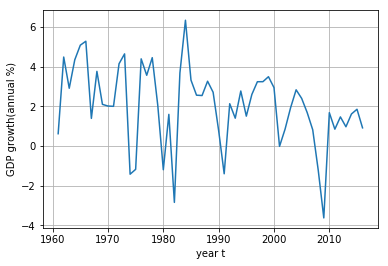

In [7]:
# y00 = np.array(y0)
t = np.array(y.index)  # NOTE: y.index = {1961 ~ 2016}

plt.plot(t,y)
plt.xlabel('year t')
plt.ylabel('GDP growth(annual %)')
plt.grid(True)


create linear model and fit the model
--

In [8]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(Xtr,ytr)  # the beta coefficients obtained  y = AB + w , from Xtr,ytr: 1961~1987 data


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

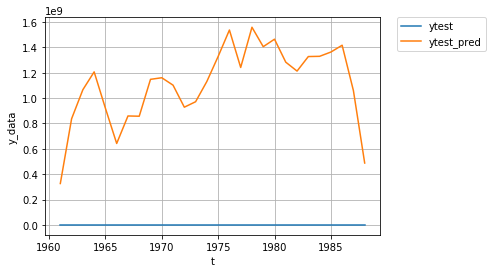

In [9]:
yts_pred = regr.predict(Xts)  # Xtr,ytr: 1961~1987; Xts,yts: 1988~2016
t = np.array(y.index[:ntr])  # t = np.linspace(1988,2016,nts) 

plt.plot(t,yts, label='ytest')
plt.plot(t,yts_pred,label='ytest_pred')
plt.legend(bbox_to_anchor=(1.05,1),loc = 2,borderaxespad=0.)
plt.xlabel('t')
plt.ylabel('y_data')
plt.grid(True)


Look into the weighting value and see the results.
--

w.shape =  (1553,)
argmax w =  0
weighting max =  38182591.0462

 --> The coefficient weighted the most is:  2005 PPP conversion factor, GDP (LCU per international $)


<Container object of 3 artists>

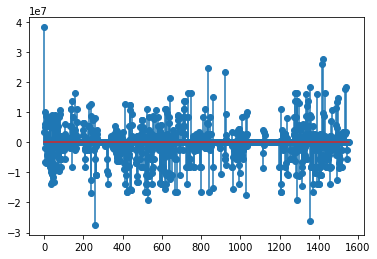

In [10]:
w = regr.coef_
w = w.T
print('w.shape = ',w.shape)
print('argmax w = ',np.argmax(w))
print('weighting max = ',w[np.argmax(w)])
print('\n --> The coefficient weighted the most is: ', IndicatorName[np.argmax(w)])
plt.stem(w)

# yts_pred

RSS_train =  5.59190757523e+17 
Rsq_train =  -5.59190757523e+17


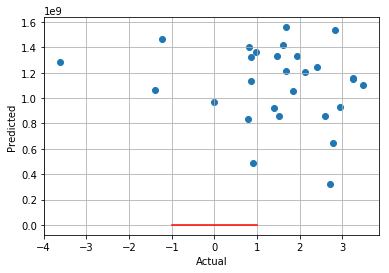

In [11]:
RSS_train = np.mean((yts_pred-yts)**2)/(np.std(yts)**2)
Rsq_train = 1-RSS_train
print('RSS_train = ',RSS_train,'\nRsq_train = ',Rsq_train)

plt.scatter(yts,yts_pred)
plt.plot([-1,1],[-1,1],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()


The result is bad!
--

So, linear model can not perform well in this case.

# @Logistic Regression


Idea:
----------------------------

-Binary classification:
--
y is GDP growth

@ drop or grow

yname = ['drop','grow']  

ylabel = {0,1}


-Multi-class classification:
--

(1) y is GDP of each year

@ set threshold: GDP value-> low, medium, high; grow or drop

yname = ['GDPlow_grow', 'GDPlow_drop', 'GDPmedium_grow', 'GDPmedium_drop', 'GDPhigh_grow', 'GDPhigh_drop']

And the given labels yl = {0,1,2,3,4,5}


(2) y is GDPgrowth of each year

@ set threshold

yname = ['large_drop','small_drop','small_growth','large_growth']

And the given labels yl = {0,1,2,3}

# Binary classification

In [12]:
#-------use ygrowth--> binary classification
y = ygrowth
ylabel = np.zeros(nyears)
yl_binary = np.zeros(nyears)

for i in range(nyears):
    if ygrowth[i]<0: # drop
        yl_binary[i] = 0
    elif ygrowth[i]>0: # grow
        yl_binary[i] = 1
    else:
        yl_binary[i] = 0
        
ylabel = yl_binary
yname = ['drop','grow']  # 0,1

ylabel
# ygrowth

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

First, try with the whole data 
-----

In [13]:
logreg = linear_model.LogisticRegression()
logreg.fit(X, ylabel)

yhat = logreg.predict(X)

A = (yhat==ylabel)
acc = np.mean(A)
print("Accuracy on training data = %f" % acc)

Accuracy on training data = 1.000000


(1553,)


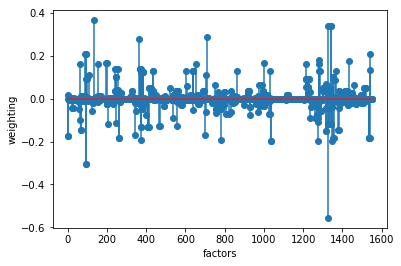

In [14]:
w = logreg.coef_
r,c = w.shape

w = np.reshape(w,r*c,1)  # or w = w.ravel()
print(w.shape)

plt.stem(w)
plt.ylabel('weighting')
plt.xlabel('factors')

Get the predicted factor responsible for GDP growth. (1) whole data binary classification
--

In [15]:
w = abs(w)
Sort = np.argsort(-w)

for i in range(2):
    large = w[Sort[i]]
    index = int(Sort[i])                   
    print('The %dth factor component influence on GDP is w%d = [%s]' %((i+1),index ,(IndicatorName[ index ])))
    

The 1th factor component influence on GDP is w1326 = [School enrollment, primary, private (% of total primary)]
The 2th factor component influence on GDP is w132 = [Battle-related deaths (number of people)]


Second, try cross validation with Kfold.
---

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

nfold = 8  # funny when nfold = 2 it's like tossing a coin 50/50 chance acc=0.5; the more nfolds the worse acc...
kf = KFold(n_splits=nfold,shuffle=True)

prec = []
rec = []
f1 = []
acc = []

for train, test in kf.split(X):            
    # Get training and test data
    Xtr = X[train,:]
    ytr = ylabel[train]
    Xts = X[test,:]
    yts = ylabel[test]
    
    
    # Fit a model
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)

    # Measure performance
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary') 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    acci = np.mean(yhat == yts)
    acc.append(acci)
    
# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)

# Compute the standard errors
prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)
acc_se = np.std(acc)/np.sqrt(nfold-1)

print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se))
print('Recall =    {0:.4f}, SE={1:.4f}'.format(recm, rec_se))
print('f1 =        {0:.4f}, SE={1:.4f}'.format(f1m, f1_se))
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

Precision = 0.9333, SE=0.0454
Recall =    0.5881, SE=0.0745
f1 =        0.6887, SE=0.0639
Accuracy =  0.5893, SE=0.0569


(1553,)


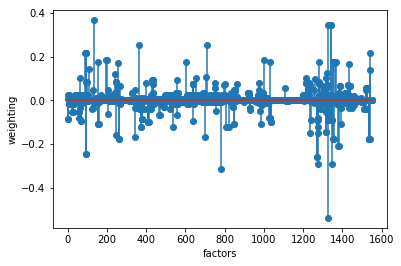

In [17]:
wK = logreg.coef_
r,c = wK.shape

wK = np.reshape(wK,r*c,1)
print(wK.shape)

plt.stem(wK)
plt.ylabel('weighting')
plt.xlabel('factors')

Get the predicted factor responsible for GDP growth.(2) Kfold binay classification
--

In [18]:
wK = abs(wK)
Sort = np.argsort(-wK)

for i in range(2):
    large = wK[Sort[i]]
    index = int(Sort[i])                   
    print('The %dth factor component influence on GDP is w%d = [%s]' %((i+1),index ,(IndicatorName[ index ])))
    

The 1th factor component influence on GDP is w1326 = [School enrollment, primary, private (% of total primary)]
The 2th factor component influence on GDP is w132 = [Battle-related deaths (number of people)]


The result is a little different.

But the most critical factor remain unchanged. i.e.--> w1326

# Multi-class classification (1): yl = yGDP
yname = ['low_grow','low_drop','medium_grow','medium_drop','high_grow','high_drop']  

y = {0,1,2,3,4,5}

In [19]:
yl = yGDP  # --> muti-class classification

ymax = np.max(yl)
ymin = np.min(yl)
d = (ymax-ymin)/3
print('y11min = ',ymin,', y11max = ',ymax,', d = ',d)

# thresholds
ylow = ymin 
ymed = ylow + d
yhigh = ylow + 2*d
print('thresholds = ',ymed,', ',yhigh)


ylabel = np.zeros(nyears)
yl_GDP = np.zeros(nyears)

for i in range(nyears):
    if abs(yl[i])<ymed and ygrowth[i]>=0: # l.g
        yl_GDP[i] = 0
    elif yGDP[i]<ymed and ygrowth[i]<0: # l.d
        yl_GDP[i] = 1
    elif yGDP[i]>=ymed and yGDP[i]<yhigh and ygrowth[i]>=0: # m.g
        yl_GDP[i] = 2
    elif yGDP[i]>=ymed and yGDP[i]<yhigh and ygrowth[i]<0:  #m.d
        yl_GDP[i] = 3
    elif yGDP[i]>=yhigh and ygrowth[i]>=0: #h.g
        yl_GDP[i] = 4
    elif yGDP[i]>=yhigh and ygrowth[i]<0: #h.d
        yl_GDP[i] = 5

ylabel = yl_GDP
        
yname = ['GDPlow_grow', 'GDPlow_drop', 'GDPmedium_grow', 'GDPmedium_drop', 'GDPhigh_grow', 'GDPhigh_drop']  # 0,1,2,3,4,5

print('ylabel.shape = ',ylabel.shape)

ylabel

y11min =  563300000000.0 , y11max =  18569100000000.0 , d =  6001933333333.333
thresholds =  6565233333333.333 ,  12567166666666.666
ylabel.shape =  (56,)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  3.,  2.,  2.,  2.,  4.,  4.,  4.,  5.,  5.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.])

First, try on all data.
--

In [20]:
logreg1 = linear_model.LogisticRegression()
logreg1.fit(X, ylabel)  # X = df, preprocessed data


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
yhat = logreg1.predict(X)
A = (yhat==ylabel)
acc = np.mean(A)
print("Accuracy on training data = %f" % acc)

Accuracy on training data = 1.000000


w1.shape =  (6, 1553)


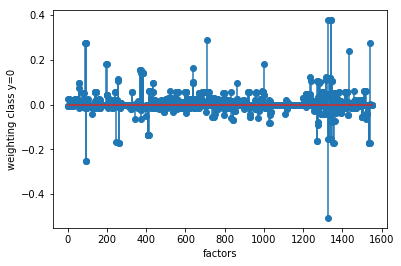

In [22]:
w1 = logreg1.coef_
print('w1.shape = ',w1.shape)  # nlabels*nfactors = 6 * 1553

plt.stem(w1[0,:])
plt.ylabel('weighting class y=0')
plt.xlabel('factors')

Get the predicted factor responsible for GDP growth.(3) whole data multi-class yl = GDP
--

In [23]:
for k in range(6):
    print('For class y=%d:' %k, yname[k] )
    Sort = np.argsort(-abs(w1[k,:]))
    for i in range(2):
        large = w1[k,:][Sort[i]]
        index = int(Sort[i])                   
        print('The %dth largest factor influence on GDP is w%d = [%s]' %((i+1),index ,(IndicatorName[ index ])))


For class y=0: GDPlow_grow
The 1th largest factor influence on GDP is w1326 = [School enrollment, primary, private (% of total primary)]
The 2th largest factor influence on GDP is w1343 = [Secondary education, pupils]
For class y=1: GDPlow_drop
The 1th largest factor influence on GDP is w1326 = [School enrollment, primary, private (% of total primary)]
The 2th largest factor influence on GDP is w1341 = [Secondary education, general pupils]
For class y=2: GDPmedium_grow
The 1th largest factor influence on GDP is w132 = [Battle-related deaths (number of people)]
The 2th largest factor influence on GDP is w246 = [Completeness of infant death reporting (% of reported infant deaths to estimated infant deaths)]
For class y=3: GDPmedium_drop
The 1th largest factor influence on GDP is w132 = [Battle-related deaths (number of people)]
The 2th largest factor influence on GDP is w1353 = [Secure Internet servers (per 1 million people)]
For class y=4: GDPhigh_grow
The 1th largest factor influence o

Second, try Kfold cross-validation.
--

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

nfold = 10  # funny when nfold = 2 it's like tossing a coin 50/50 chance acc=0.5; the more nfolds the worse acc...
kf = KFold(n_splits=nfold,shuffle=True)

acc = []
err_rate = []

for train, test in kf.split(X):            
    # Get training and test data
    Xtr = X[train,:]
    ytr = ylabel[train]
    Xts = X[test,:]
    yts = ylabel[test]
    
    
    # Fit a model
    logreg1.fit(Xtr, ytr)
    yhat = logreg1.predict(Xts)

    # Measure performance
    acci = np.mean(yhat == yts)
    acc.append(acci)
    err_ratei = np.mean(yhat != yts)
    err_rate.append(err_ratei)

accm= np.mean(acc)
acc_se = np.std(acc)/np.sqrt(nfold-1)
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

err_mean = np.mean(err_rate)
err_se = np.std(err_rate)/np.sqrt(nfold-1)
print('Errpr rate = %f, SE = %f'%(err_mean,err_se))


Accuracy =  0.5500, SE=0.0543
Errpr rate = 0.450000, SE = 0.054263


w2.shape =  (6, 1553)


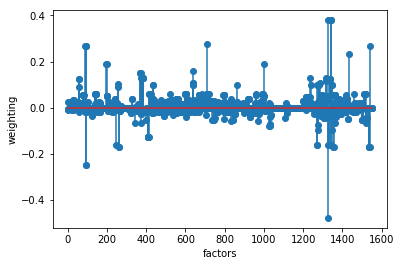

In [25]:
w2 = logreg1.coef_
print('w2.shape = ',w2.shape)  # nlabels*nfactors = 6 * 1553

plt.stem(w2[0,:])
plt.ylabel('weighting')
plt.xlabel('factors')

Get the predicted factor responsible for GDP growth.(4) Kfold Multi-class yl = GDP
--

In [26]:
for k in range(6):
    print('For class y=%d:' %k, yname[k])
    Sort = np.argsort(-abs(w2[k,:]))
    for i in range(2):
        large = w2[k,:][Sort[i]]
        index = int(Sort[i])                   
        print('The %dth largest factor influence on GDP is w%d = [%s]' %((i+1),index ,(IndicatorName[ index ])))


For class y=0: GDPlow_grow
The 1th largest factor influence on GDP is w1326 = [School enrollment, primary, private (% of total primary)]
The 2th largest factor influence on GDP is w1343 = [Secondary education, pupils]
For class y=1: GDPlow_drop
The 1th largest factor influence on GDP is w1326 = [School enrollment, primary, private (% of total primary)]
The 2th largest factor influence on GDP is w1341 = [Secondary education, general pupils]
For class y=2: GDPmedium_grow
The 1th largest factor influence on GDP is w132 = [Battle-related deaths (number of people)]
The 2th largest factor influence on GDP is w246 = [Completeness of infant death reporting (% of reported infant deaths to estimated infant deaths)]
For class y=3: GDPmedium_drop
The 1th largest factor influence on GDP is w132 = [Battle-related deaths (number of people)]
The 2th largest factor influence on GDP is w791 = [Manufactures imports (% of merchandise imports)]
For class y=4: GDPhigh_grow
The 1th largest factor influence o

L1-Regularization
--

In [27]:
# penalty valuew to test
npen = 30
C_test = np.logspace(-2,3,npen)

nfold = 10
kf = KFold(n_splits=nfold, shuffle = True)
err_rate = np.zeros((npen,nfold))

logregL1 = linear_model.LogisticRegression(penalty='l1',warm_start=True)

for ifold, Ind in enumerate(kf.split(X)):

    Itr, Its = Ind
    Xtr = X[Itr,:]
    ytr = ylabel[Itr]
    Xts = X[Its,:]
    yts = ylabel[Its]
    
    # loop over penalty levels
    for ipen, c in enumerate(C_test):
        
        logregL1.C = c
        logregL1.fit(Xtr, ytr)
        
        yhat = logregL1.predict(Xts)
        err_rate[ipen,ifold] = np.mean(yhat != yts)
        
    print('Fold %d'%ifold)


Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9


The minimum test error rate = 0.203333, SE = 0.056317


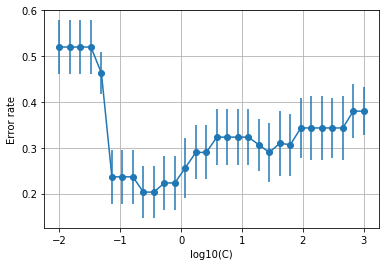

In [28]:
err_mean = np.mean(err_rate, axis = 1)
err_se = np.std(err_rate,axis=1)/np.sqrt(nfold-1)

plt.errorbar(np.log10(C_test), err_mean, marker = 'o',yerr = err_se)
# plt.ylim([0,0.02])
plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Error rate')

imin = np.argmin(err_mean)
print('The minimum test error rate = %f, SE = %f'%(err_mean[imin], err_se[imin]))

In [29]:
# one standard err rule
err_tgt = err_mean[imin] + err_se[imin]  
iopt = np.where(err_mean < err_tgt)[0][0]
C_opt = C_test[iopt]

print('optimal C = %f' % C_opt)

optimal C = 0.072790


After the optimal C applied, the weight matrix is much more sparse than the original one. 

Hence the roles of particular factors are more clearly visible.

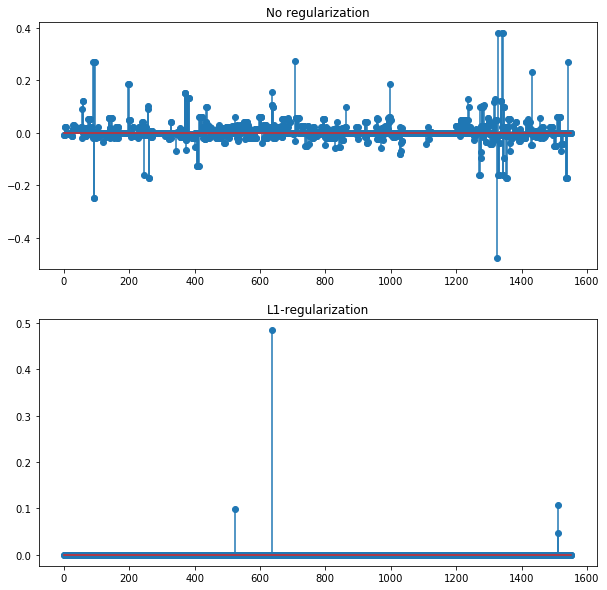

In [30]:
logreg = linear_model.LogisticRegression(C = C_opt,penalty='l1')
logreg.C = C_opt
logreg.fit(X,ylabel)

w_l1 = logreg.coef_

plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.stem(w2[0,:])
plt.title('No regularization')

plt.subplot(2,1,2)
plt.stem(w_l1[0,:])
plt.title('L1-regularization')
# w_l1[0,:]

Cross-validation again with optimized C value.
--

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

nfold = 10  # funny when nfold = 2 it's like tossing a coin 50/50 chance acc=0.5; the more nfolds the worse acc...
kf = KFold(n_splits=nfold,shuffle=True)
logreg1 = linear_model.LogisticRegression(C = C_opt,penalty='l1')
logreg1.C = C_opt

acc = []
err_rate = []

for train, test in kf.split(X):            
    # Get training and test data
    Xtr = X[train,:]
    ytr = ylabel[train]
    Xts = X[test,:]
    yts = ylabel[test]
    
    
    # Fit a model
    logreg1.fit(Xtr, ytr)
    yhat = logreg1.predict(Xts)

    # Measure performance
    acci = np.mean(yhat == yts)
    acc.append(acci)
    err_ratei = np.mean(yhat != yts)
    err_rate.append(err_ratei)

accm= np.mean(acc)
acc_se = np.std(acc)/np.sqrt(nfold-1)
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

err_mean = np.mean(err_rate)
err_se = np.std(err_rate)/np.sqrt(nfold-1)
print('Errpr rate = %f, SE = %f'%(err_mean,err_se))


Accuracy =  0.7867, SE=0.0323
Errpr rate = 0.213333, SE = 0.032280


Accuracy rise slightly.

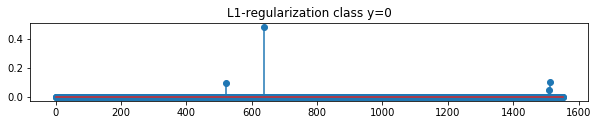

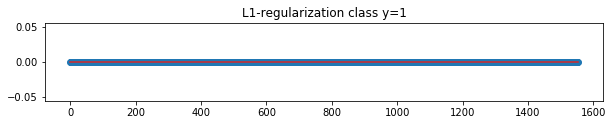

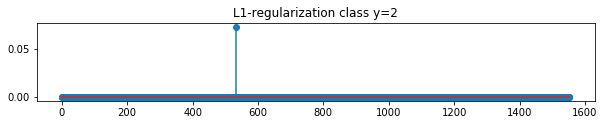

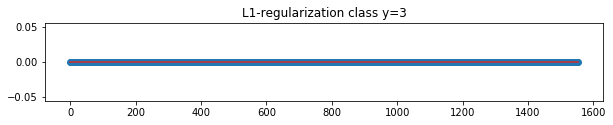

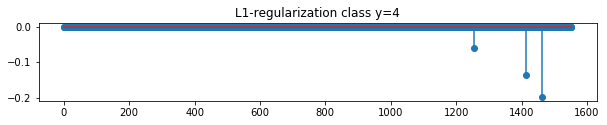

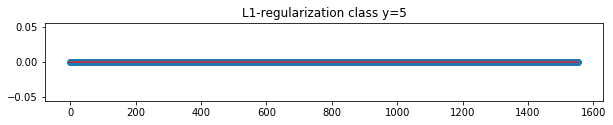

In [32]:
for i in range(6):
    plt.figure(figsize = (10,10))
    plt.subplot(6,1,i+1)
    plt.stem(w_l1[i,:])
    plt.title('L1-regularization class y=%d' %i)


Get the predicted factor responsible for GDP growth.(5) Kfold L1-Regularization Multi-class yl=GDP
--

In [33]:
for k in range(6):
    print('- For class y=%d:' %k, yname[k])
    Sort = np.argsort(-abs(w_l1[k,:]))
    
    for i in range(2):
        large = w_l1[k,:][Sort[i]]
        if large ==0:
            print('Can not find a particular coefficient responsible for this class.')
        else:
            index = int(Sort[i])                   
            print('The %dth largest factor influence on GDP is w%d = [%s]' %((i+1),index ,(IndicatorName[ index ])),large)    


- For class y=0: GDPlow_grow
The 1th largest factor influence on GDP is w637 = [Immunization, HepB3 (% of one-year-old children)] 0.484904141654
The 2th largest factor influence on GDP is w1513 = [Unemployment, total (% of total labor force) (modeled ILO estimate)] 0.106821255555
- For class y=1: GDPlow_drop
Can not find a particular coefficient responsible for this class.
Can not find a particular coefficient responsible for this class.
- For class y=2: GDPmedium_grow
The 1th largest factor influence on GDP is w534 = [GHG net emissions/removals by LUCF (Mt of CO2 equivalent)] 0.0737030714583
Can not find a particular coefficient responsible for this class.
- For class y=3: GDPmedium_drop
Can not find a particular coefficient responsible for this class.
Can not find a particular coefficient responsible for this class.
- For class y=4: GDPhigh_grow
The 1th largest factor influence on GDP is w1464 = [Total tax rate (% of commercial profits)] -0.198129552324
The 2th largest factor influen

---> Some classes can't find the coefficient responsible for classifying the class.

# Multi-class classification (2): yl = yGDPgrowth

yname = ['high_drop','low_drop','low_grow','high_grow']  

y = {0,1,2,3}

In [34]:
y0 = ygrowth  # --> muti-class classification

ymax = np.max(y0)
ymin = np.min(y0)

dp = ymax/2
dn = abs(ymin)/2

print('y0min = ',ymin,', y0max = ',ymax,', dp = ',dp,', dn = ',dn)

# thresholds
ydhigh = ymin
ydlow = ymin + dn
yglow = 0
yghigh = 0 + dp
print('thresholds = ',ydhigh,', ',ydlow,', ',yglow,', ',yghigh,', ', ymax)

ylabel = np.ones(nyears)
yl_growth = np.ones(nyears)


for i in range(nyears):
    if (y0[i]>=ydhigh) and (y0[i]<ydlow): # h.d
        yl_growth[i] = 0
    elif y0[i]>=ydlow and y0[i]<0: # l.d
        yl_growth[i] = 1
    elif y0[i]>=0 and y0[i]<yghigh: # l.g
        yl_growth[i] = 2
    elif y0[i]>=yghigh and y0[i]<ymax:  #h.g
        yl_growth[i] = 3

ylabel = yl_growth

yname = ['high_drop','low_drop','low_grow','high_grow']  # 0,1,2,3

print('ylabel.shape = ',ylabel.shape)

ylabel


y0min =  -3.624124115 , y0max =  6.334427895 , dp =  3.1672139475 , dn =  1.8120620575
thresholds =  -3.624124115 ,  -1.8120620575 ,  0 ,  3.1672139475 ,  6.334427895
ylabel.shape =  (56,)


array([ 2.,  3.,  2.,  3.,  3.,  3.,  2.,  3.,  2.,  2.,  2.,  3.,  3.,
        1.,  1.,  3.,  3.,  3.,  2.,  1.,  2.,  0.,  3.,  1.,  3.,  2.,
        2.,  3.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,
        2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  0.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.])

(1) Try on all data.
--

In [35]:
logreg1 = linear_model.LogisticRegression()
logreg1.fit(X, ylabel)  # X = df, preprocessed data

yhat = logreg1.predict(X)
A = (yhat==ylabel)
acc = np.mean(A)
print("Accuracy on training data = %f" % acc)

Accuracy on training data = 1.000000


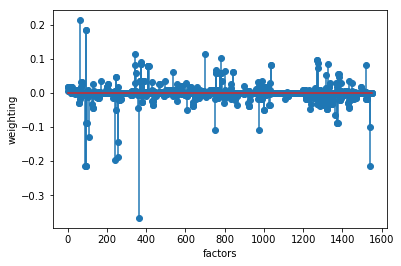

In [36]:
w1 = logreg1.coef_

plt.stem(w1[0,:])
plt.ylabel('weighting')
plt.xlabel('factors')

Get the predicted factor responsible for GDP growth.(6) all data Multi-class yl = ygrowth
--

In [37]:
for k in range(4):
    print('---For class y=%d:' %k,yname[k])
    Sort = np.argsort(-abs(w1[k,:]))
    
    for i in range(2):
        large = w1[k,:][Sort[i]]
        index = int(Sort[i])                   
        print('The %dth largest factor influence on GDP is w%d = [%s]' %((i+1),index ,(IndicatorName[ index ])),large)    
#     print('\n')

---For class y=0: high_drop
The 1th largest factor influence on GDP is w363 = [Droughts, floods, extreme temperatures (% of population, average 1990-2009)] -0.36658152203
The 2th largest factor influence on GDP is w1542 = [Water productivity, total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal)] -0.215799537494
---For class y=1: low_drop
The 1th largest factor influence on GDP is w1032 = [Physicians (per 1,000 people)] 0.365730803079
The 2th largest factor influence on GDP is w132 = [Battle-related deaths (number of people)] -0.361942688808
---For class y=2: low_grow
The 1th largest factor influence on GDP is w374 = [Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)] -0.603482906041
The 2th largest factor influence on GDP is w372 = [Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)] -0.587148989281
---For class y=3: high_grow
The 1th largest factor influence on GDP i

(2) Try Kfold cross-validation
--

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

nfold = 10  # funny when nfold = 2 it's like tossing a coin 50/50 chance acc=0.5; the more nfolds the worse acc...
kf = KFold(n_splits=nfold,shuffle=True)

acc = []
err_rate = []

for train, test in kf.split(X):            
    # Get training and test data
    Xtr = X[train,:]
    ytr = ylabel[train]
    Xts = X[test,:]
    yts = ylabel[test]
    
    
    # Fit a model
    logreg1.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)

    # Measure performance
    acci = np.mean(yhat == yts)
    acc.append(acci)
    err_ratei = np.mean(yhat != yts)
    err_rate.append(err_ratei)

accm= np.mean(acc)
acc_se = np.std(acc)/np.sqrt(nfold-1)
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))


err_mean = np.mean(err_rate)
err_se = np.std(err_rate)/np.sqrt(nfold-1)
print('Errpr rate = %f, SE = %f'%(err_mean,err_se))


Accuracy =  0.1567, SE=0.0584
Errpr rate = 0.843333, SE = 0.058384


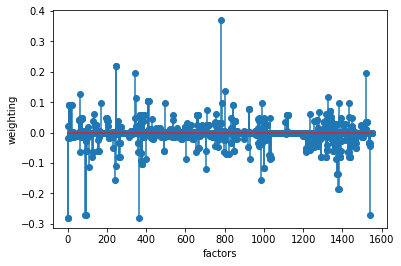

In [39]:
w2 = logreg1.coef_

plt.stem(w2[0,:])
plt.ylabel('weighting')
plt.xlabel('factors')

Get the predicted factor responsible for GDP growth.(7) Kfold Multi-class yl = ygrowth
--

In [40]:
for k in range(4):
    print('---For class y=%d:' %k,yname[k])
    Sort = np.argsort(-abs(w2[k,:]))
    for i in range(2):
        large = w2[k,:][Sort[i]]
        index = int(Sort[i])                   
        print('The %dth largest factor influence on GDP is w%d = [%s]' %((i+1),index ,(IndicatorName[ index ])),large)
#     print('\n')

---For class y=0: high_drop
The 1th largest factor influence on GDP is w783 = [Low-birthweight babies (% of births)] 0.369864151132
The 2th largest factor influence on GDP is w363 = [Droughts, floods, extreme temperatures (% of population, average 1990-2009)] -0.280965795467
---For class y=1: low_drop
The 1th largest factor influence on GDP is w1032 = [Physicians (per 1,000 people)] 0.432136268116
The 2th largest factor influence on GDP is w363 = [Droughts, floods, extreme temperatures (% of population, average 1990-2009)] 0.331642463425
---For class y=2: low_grow
The 1th largest factor influence on GDP is w1002 = [Patent applications, nonresidents] -0.475305487952
The 2th largest factor influence on GDP is w1003 = [Patent applications, residents] -0.475305487952
---For class y=3: high_grow
The 1th largest factor influence on GDP is w1032 = [Physicians (per 1,000 people)] -0.494686176781
The 2th largest factor influence on GDP is w1002 = [Patent applications, nonresidents] 0.4426995450

(3) L1-regularization
--

In [41]:
# penalty valuew to test
npen = 30
C_test = np.logspace(-2,3,npen)

nfold = 10
kf = KFold(n_splits=nfold, shuffle = True)
err_rate = np.zeros((npen,nfold))

logregL1 = linear_model.LogisticRegression(penalty='l1',warm_start=True)

for ifold, Ind in enumerate(kf.split(X)):

    Itr, Its = Ind
    Xtr = X[Itr,:]
    ytr = ylabel[Itr]
    Xts = X[Its,:]
    yts = ylabel[Its]
    
    # loop over penalty levels
    for ipen, c in enumerate(C_test):
        
        logregL1.C = c
        logregL1.fit(Xtr, ytr)
        
        yhat = logregL1.predict(Xts)
        err_rate[ipen,ifold] = np.mean(yhat != yts)
        
    print('Fold %d'%ifold)

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9


The minimum test error rate = 0.423333, SE = 0.072869


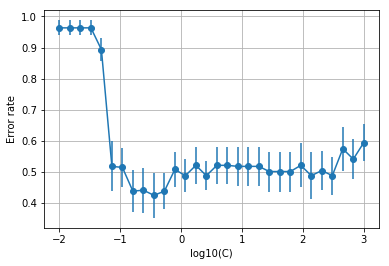

In [42]:
err_mean = np.mean(err_rate, axis = 1)
err_se = np.std(err_rate,axis=1)/np.sqrt(nfold-1)

plt.errorbar(np.log10(C_test), err_mean, marker = 'o',yerr = err_se)
plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Error rate')

imin = np.argmin(err_mean)
print('The minimum test error rate = %f, SE = %f'%(err_mean[imin], err_se[imin]))

In [43]:
err_tgt = err_mean[imin] + err_se[imin]
iopt = np.where(err_mean < err_tgt)[0][0]
C_opt = C_test[iopt]

print('optimal C = %f' % C_opt)

optimal C = 0.161026


Apply C_opt

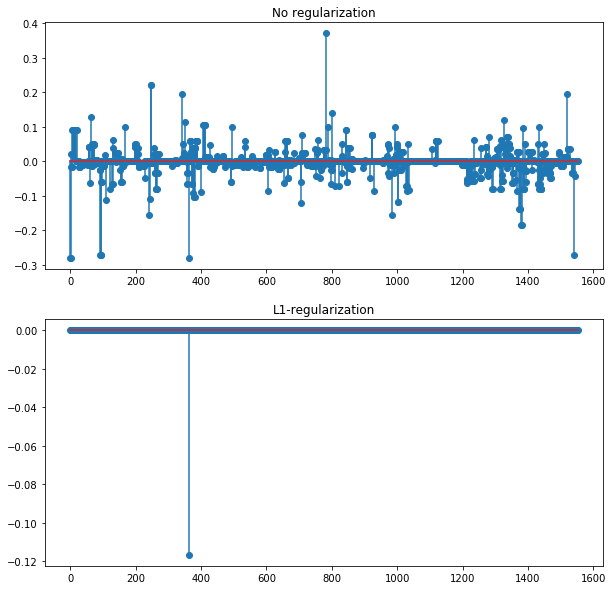

In [44]:
logreg = linear_model.LogisticRegression(C = C_opt,penalty='l1')
logreg.C = C_opt
logreg.fit(X,ylabel)

w_l1 = logreg.coef_

plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.stem(w2[0,:])
plt.title('No regularization')

plt.subplot(2,1,2)
plt.stem(w_l1[0,:])
plt.title('L1-regularization')


Cross validate again with C_opt.
--

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

nfold = 10  # funny when nfold = 2 it's like tossing a coin 50/50 chance acc=0.5; the more nfolds the worse acc...
kf = KFold(n_splits=nfold,shuffle=True)
logreg1 = linear_model.LogisticRegression(C = C_opt,penalty='l1')
logreg1.C = C_opt

acc = []
err_rate = []

for train, test in kf.split(X):            
    # Get training and test data
    Xtr = X[train,:]
    ytr = ylabel[train]
    Xts = X[test,:]
    yts = ylabel[test]
    
    
    # Fit a model
    logreg1.fit(Xtr, ytr)
    yhat = logreg1.predict(Xts)

    # Measure performance
    acci = np.mean(yhat == yts)
    acc.append(acci)
    err_ratei = np.mean(yhat != yts)
    err_rate.append(err_ratei)

accm= np.mean(acc)
acc_se = np.std(acc)/np.sqrt(nfold-1)
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

err_mean = np.mean(err_rate)
err_se = np.std(err_rate)/np.sqrt(nfold-1)
print('Errpr rate = %f, SE = %f'%(err_mean,err_se))


Accuracy =  0.5767, SE=0.0680
Errpr rate = 0.423333, SE = 0.067960


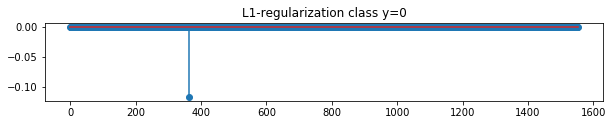

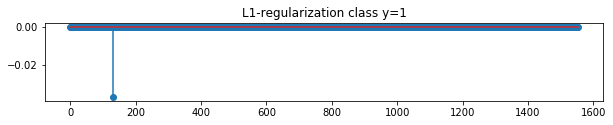

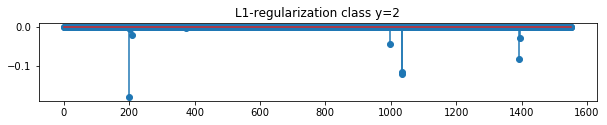

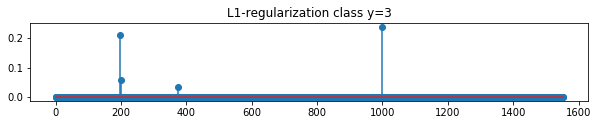

In [46]:
for i in range(4):
    plt.figure(figsize = (10,10))
    plt.subplot(6,1,i+1)
    plt.stem(w_l1[i,:])
    plt.title('L1-regularization class y=%d' %i)

Get the predicted factor responsible for GDP growth.(8) Kfold L1-regularization Multi-class yl = ygrowth
--

In [47]:
for k in range(4):
    print('---For class y=%d:' %k, yname[k])
    Sort = np.argsort(-abs(w_l1[k,:]))
    
    for i in range(2):
        large = w_l1[k,:][Sort[i]]
        if large == 0:
            print('Can not find a particular coefficient responsible for this class.')
        else:
            index = int(Sort[i])                   
            print('The %dth largest factor influence on GDP is w%d = [%s]' %((i+1),index ,(IndicatorName[ index ])),large)
 #     print('\n')


---For class y=0: high_drop
The 1th largest factor influence on GDP is w363 = [Droughts, floods, extreme temperatures (% of population, average 1990-2009)] -0.116458107166
Can not find a particular coefficient responsible for this class.
---For class y=1: low_drop
The 1th largest factor influence on GDP is w132 = [Battle-related deaths (number of people)] -0.0367887676462
Can not find a particular coefficient responsible for this class.
---For class y=2: low_grow
The 1th largest factor influence on GDP is w198 = [Children out of school, female (% of female primary school age)] -0.178219998898
The 2th largest factor influence on GDP is w1035 = [PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)] -0.119482811697
---For class y=3: high_grow
The 1th largest factor influence on GDP is w998 = [Over-age students, primary (% of enrollment)] 0.239999496926
The 2th largest factor influence on GDP is w197 = [Children out of school (% of primary school age

---> The result accuracy is around 0.57.
--

# @Nonlinear Optimization

  - gradient descent: w_k+1 = w+k - alpha*grad_f(w_k)    ; NOTE: find local minima only.
--
Given objective function f(w), find parameters w = argmin[f(w)]

To minimize the Loss function J(w)

- local minima grad_J = 0 


In [48]:
X = df1
ylabel = yl_binary   # switch to try: yl_binary  yl_GDP  yl_growth
ylabel

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [49]:
ntr = int(nyears/2)
nts = int(nyears - ntr)

Xtr = X[:ntr,:]  # training
ytr = ylabel[:ntr]
Xts = X[ntr:,:]  # test
yts = ylabel[ntr:]

## Computing the Gradient and Loss Function

Recall that training a logistic function means finding a weight vector `w` for the classification rule:

    P(y=1|x,w) = 1/(1+\exp(-z)), z = w[0] + w[1]*x[0] + ... + w[k]x[k-1]
    
From the class notes in logistic regression, we saw that the weight vector can be found by minimizing  the negative log likelihood.  The negative log likelihood is called the *loss* function.  For the logistic regression problem, the loss function simplifies to:


    f(w) = \sum_i -y[i]z[i] + ln(1+exp(z[i])),  z[i] = w[0] + w[1]X[i,0] + ... + w[k]X[i,k-1].
    
To run a numerical optimizer in python, we need to implement a python function that returns `f(w)` and its gradient.  

Since the function `f(w)` also depends parameters `X` and `y`, it is easier to implement the function as a method in a class that contains the parameters.  In the code below, we create a class `LogisticFun` where the constructor takes the parameters `X` and `y`.  Then, the class method `feval` takes a variable `w` and computes the loss and its gradient.

Or use lambda calculus.

In [50]:
class LogisticFun(object):
    def __init__(self,X,y):
        """
        Class for computes the loss and gradient for a logistic regression problem.
        
        The constructor takes the data matrix `X` and response vector y for training.
        """
        self.X = X
        self.y = y
        n = X.shape[0]
        self.A = np.column_stack((np.ones(n,), X))

    def feval(self,w):
        """
        Compute the loss and gradient for a given weight vector
        """
        # The loss is the binary cross entropy
        z = self.A.dot(w)
        py = 1/(1+np.exp(-z))
        f = np.sum((1-self.y)*z - np.log(py))
        
        # Gradient
        df_dz = py-self.y
        fgrad = self.A.T.dot(df_dz)
        return f, fgrad

In [51]:
log_fun = LogisticFun(Xtr,ytr)

Verify this gradient calculator 
--
By first order approximation,see if the gradient is calculate correctly.

In [52]:
# test the gradient is correct
# Take a random initial point
p = X.shape[1]+1
w0 = np.random.randn(p)

# Perturb the point
step = 1e-6
w1 = w0 + step*np.random.randn(p)

# Measure the function and gradient at w0 and w1
f0, fgrad0 = log_fun.feval(w0)
f1, fgrad1 = log_fun.feval(w1)

# Predict the amount the function should have changed based on the gradient
df_est = fgrad0.dot(w1-w0)

# Print the two values to see if they are close
print("Actual f1-f0    = %12.4e" % (f1-f0))
print("Predicted f1-f0 = %12.4e" % df_est)

Actual f1-f0    =  -4.2370e-05
Predicted f1-f0 =  -4.2370e-05


Function of value parameters
--
Return the loss function(i.e. the negative log likelihood for logistic regression) f(w) and its gradient. 

In [53]:
# Create a function with all the parameters
def feval_param(w,X,y):
    """
    Compute the loss and gradient given w,X,y
    """
    # Construct transform matrix
    n = X.shape[0]
    A = np.column_stack((np.ones(n,), X))

    # The loss is the binary cross entropy
    z = A.dot(w)
    py = 1/(1+np.exp(-z))
    f = np.sum((1-y)*z - np.log(py))

    # Gradient
    df_dz = py-y
    fgrad = A.T.dot(df_dz)
    return f, fgrad

# Create a function with X,y fixed
feval = lambda w: feval_param(w,Xtr,ytr)

# You can now pass a parameter like w0
f0, fgrad0 = feval(w0)

Define Gradient descent optimizer
---

In [54]:
def grad_opt_simp(feval, winit, lr=1e-3,nit=1000):
    """
    Simple gradient descent optimization
    
    feval:  A function that returns f, fgrad, the objective function and its gradient
    winit:  Initial estimate
    lr:     learning rate
    nit:    Number of iterations
    """
    # Initialize
    w0 = winit
    
    # Create history dictionary for tracking progress per iteration.
    # This isn't necessary if you just want the final answer, but it 
    # is useful for debugging
    hist = {'w': [], 'f': []}
    
    # Loop over iterations
    for it in range(nit):

        # Evaluate the function and gradient
        f0, fgrad0 = feval(w0)

        # Take a gradient step
        w0 = w0 - lr*fgrad0
        
         # Save history
        hist['f'].append(f0)
        hist['w'].append(w0)

    # Convert to numpy arrays
    for elem in ('f', 'w'):
        hist[elem] = np.array(hist[elem])
    return w0, f0, hist

Run gradient descent
--

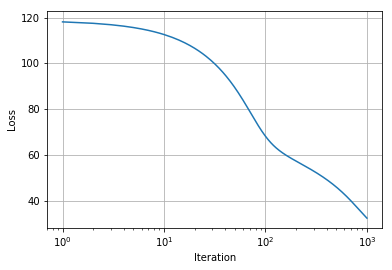

In [55]:
# Initial condition
winit = np.random.randn(p)

# Parameters
feval = log_fun.feval   # fit model log_fun with Xtr, ytr
nit = 1000
lr = 1e-5

# Run the gradient descent
w, f0, hist = grad_opt_simp(feval, winit, lr=lr, nit=nit)

# Plot the training loss
t = np.arange(nit)
plt.semilogx(t, hist['f'])
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.grid()


measure accuracy
--

In [56]:
def predict(X,w):
    z = X.dot(w[1:]) + w[0]
    yhat = (z > 0)
    return yhat

yhat = predict(Xts,w)
acc = np.mean(yhat == yts)
print("Test accuracy = %f" % acc)

Test accuracy = 0.392857


Find the component in w_min = argmin[f(w_min)] effects the result the most.
--

w.shape =  (1554,) [-0.64052578 -0.46185866  1.50982043 ...,  0.2227339  -0.10230697
  0.57592467]


<Container object of 3 artists>

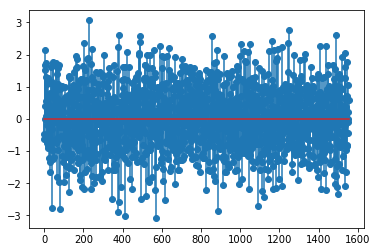

In [57]:
print('w.shape = ',w.shape,w)
plt.stem(w)

Get the predicted factor responsible for GDP growth.(9) Nonlinear gredient descent with binary classification yl = ygrowth
--

In [58]:
Sort = np.argsort(-abs(w[1:]))
for i in range(2):
    index = int(Sort[i])                   
    print('The %dth largest factor influence on GDP is w%d = [%s]' %((i+1),index ,(IndicatorName[ index ])))
        

The 1th largest factor influence on GDP is w570 = [Gross domestic savings (% of GDP)]
The 2th largest factor influence on GDP is w227 = [Combustible renewables and waste (% of total energy)]


Effect of learning rate
--
try different learning rate

lr=    1.00e-05  Test accuracy = 0.392857
lr=    1.00e-04  Test accuracy = 0.392857
lr=    1.00e-03  Test accuracy = 0.428571


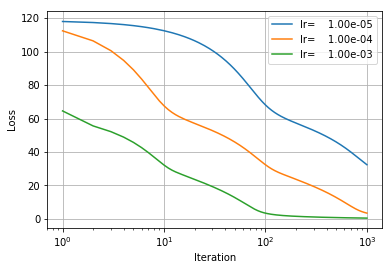

In [59]:
# Learning rate values to test
lr_test = [1e-5,1e-4,1e-3]
ntest = len(lr_test)

# Strings for the legend
leg_str = []
wlr = np.zeros((3,1554))

for i, lr in enumerate(lr_test):
    # Run the optimizer
    w, f0, hist = grad_opt_simp(feval, winit, lr=lr, nit=nit)  
    wlr[i] = w
    
    # Plot the results
    plt.semilogx(t, hist['f'])
    leg_str.append("lr=%12.2e" % lr)
    
    # Measure the test accuracy
    yhat = predict(Xts,w)
    acc = np.mean(yhat == yts)
    print("lr=%12.2e  Test accuracy = %f" % (lr, acc))
    
plt.grid()
plt.legend(leg_str, loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Iteration')

--> If set iterration nit large enough, the accuracy will converge to around 0.45. Guess it's the best it can do for this case analysis.

# @SVM Supportin Vector Machines

margin = gamma/||w||

set gamma = 1
So, m = 1/ ||w||

hinge loss: L(w,b) = max(0, 1-yz)
- yz >= 1  : classified correctly
- yz = 0~1 : margin too small (violates margin)
- yz <= 0  : mis-classified

SVM optimization:
--
minJ(w,b)
J(w,b) = C*sum{Li(w,b)}+1/2*||w||^2


- slack variable epsilon e (= max(0, 1-yz); the amount og sample i misses margin target)
object constraint: y(z) >= 1-e 

- e = 0  : corredct
- e >= 0 : sample violates margin  <----- SVs
- e >= 1 : mis-classified

classifier weight: w = sum{alphai * yi * xi}
- alphai > 0 : xi is a SV
- alphai = 0 : xi is not SV


SVM kernals: http://scikit-learn.org/stable/modules/svm.html#svm-kernels

- 'rbf': k = exp(-gamma*|x-x'|)


NOTE:
- Logistic regression focuses on maximizing the
probability of the data. The farther the data lies from
the separating hyperplane (on the correct side), the
happier LR is.
- An SVM tries to find the separating hyperplane that
maximizes the distance of the closest points to the
margin (the support vectors). If a point is not a
support vector, it doesn’t really matter. 


In [60]:
from sklearn import svm

# Create a classifier: a support vector classifier
svc = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=.0073,verbose=10)  # 'rbf':nonlinear kernal 'sigmoid' 'poly' 'linear'
# svc = svm.SVC(probability=False, kernel='sigmoid', C=1, gamma=1,verbose=10)
# svc = svm.SVR(C=1.0, epsilon=0.2)

In [61]:
X = df1
ylabel = yl_binary   # yl_binary  yl_GDP  yl_growth

# ntr = int(nyears/2)
# nts = int(nyears - ntr)

# Xtr = X[:ntr,:]  # training
# ytr = ylabel[:ntr]
# Xts = X[ntr:,:]  # test
# yts = ylabel[ntr:]

# ####
nsamp = X.shape[0]
Iperm = np.random.permutation(nsamp)  # random num in range of nsamp
print(nsamp,Iperm,Iperm.shape)


Xtr = X[Iperm[:ntr],:]
ytr = ylabel[Iperm[:ntr]]
Xts = X[Iperm[ntr:ntr+nts],:]
yts = ylabel[Iperm[ntr:ntr+nts]]

ylabel

56 [12  0 19  2  6 37  7 29 27 23 31  3 52 47 43 26 38  9 53 25 32 18 10 44 50
 46 51 45 21 22 11 40  8 30  5 34 28 33 42 48 35  1 54 24 13 16 17 39 36 49
  4 41 15 55 20 14] (56,)


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [62]:
svc.fit(Xtr,ytr)

[LibSVM]

SVC(C=2.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0073, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=10)

In [63]:
yts_hat= svc.predict(Xts)
print(yts_hat.shape)

# yts_hat=np.reshape(yts_hat,(28,1))
acc = np.mean(yts_hat == yts)
print('Accuaracy = {0:f}'.format(acc))

(28,)
Accuaracy = 0.785714


Confusion matrix: row:->redicted; columns->actual

If binary classification: [(tn, fp), 
                           (fn, tp)]

[[ 0  6]
 [ 0 22]]
normalized C = 
 [[ 0.     0.273]
 [ 0.     1.   ]] 
 (2, 2)
yts =      [ 0.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.] 
yts_hat =  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


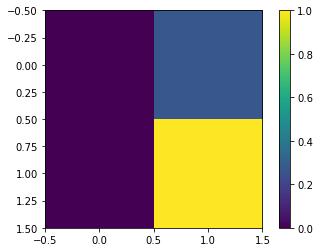

In [64]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(yts,yts_hat)
print(C)

# normalize C
Csum = np.sum(C,1)
new_c = C/ Csum[np.newaxis,:]
print('normalized C = \n',np.array_str(new_c, precision=3, suppress_small=True),'\n',new_c.shape)

plt.imshow(new_c, interpolation='none')
plt.colorbar()
print('yts =     ',yts,'\nyts_hat = ',yts_hat)

Try and get the supporting vectors.
--

In [65]:
# get support vectors
sv = svc.support_vectors_

# get number of support vectors for each class
numSV = svc.n_support_ 
totSV = sum(numSV)
print('numSV = ',numSV,'total SVs = ',totSV)

# get indices of support vectors
indexSV = svc.support_
print('indexSV = ',indexSV)


numSV =  [ 2 24] total SVs =  26
indexSV =  [ 2 13  0  1  3  4  5  6  7  8  9 10 12 14 15 16 17 18 20 21 22 23 24 25 26
 27]


In [66]:
Xsv = np.zeros((nyears,totSV))

for i in range(totSV):
    Xsv[:,i] = X[:,indexSV[i]] 
Xsv.shape

(56, 26)

Rerun using only SVs
--

56 [31  6 37  9 33 11 40  7 25 52 27 17 41 13 45 12  8 10 30 53 36 51 18 49  4
 24 22  2 14 29 23  3  5 55  1 16 32 44 46 34 20 26  0 15 21 48 39 54 47 42
 35 38 43 19 50 28] (56,)
[LibSVM](28,)
Accuaracy = 0.821429
[[ 0  5]
 [ 0 23]]
normalized C = 
 [[ 0.     0.217]
 [ 0.     1.   ]] 
 (2, 2)
yts =      [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.
  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.] 
yts_hat =  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


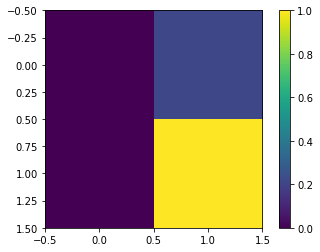

In [67]:
nsamp = Xsv.shape[0]
Iperm = np.random.permutation(nsamp)  # random num in range of nsamp
print(nsamp,Iperm,Iperm.shape)


# ntr = int(nyears/2)
# nts = int(nyears - ntr)
# Xtr = X[:ntr,:]  # training
# ytr = ylabel[:ntr]
# Xts = X[ntr:,:]  # test
# yts = ylabel[ntr:]
### ---- or ------
Xtr = Xsv[Iperm[:ntr],:]
ytr = ylabel[Iperm[:ntr]]
Xts = Xsv[Iperm[ntr:ntr+nts],:]
yts = ylabel[Iperm[ntr:ntr+nts]]

svc.fit(Xtr,ytr)

yts_hat= svc.predict(Xts)
print(yts_hat.shape)

# yts_hat=np.reshape(yts_hat,(28,1))
acc = np.mean(yts_hat == yts)
print('Accuaracy = {0:f}'.format(acc))


from sklearn.metrics import confusion_matrix
C = confusion_matrix(yts,yts_hat)
print(C)

# normalize C
Csum = np.sum(C,1)
new_c = C/ Csum[np.newaxis,:]
print('normalized C = \n',np.array_str(new_c, precision=3, suppress_small=True),'\n',new_c.shape)

plt.imshow(new_c, interpolation='none')
plt.colorbar()
print('yts =     ',yts,'\nyts_hat = ',yts_hat)


Plot the supporting vectors with its real class label.
--

num of class 0 = (8,) , num of class 1 (48,)
Xsv[I0[0],:] class 0 =  (26,) 
X0 class 1 =  (48, 26)
X0 class 0 =  (8,) 
X1 class 1 =  (48,)


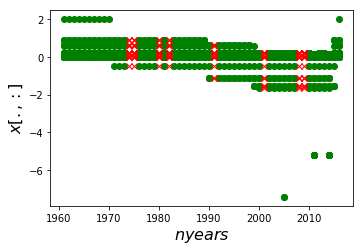

In [68]:
I0 = np.where(ylabel==0)[0]
I1 = np.where(ylabel==1)[0]
print('num of class 0 =',I0.shape,', num of class 1',I1.shape)
print('Xsv[I0[0],:] class 0 = ',Xsv[I0[0],:].shape,'\nX0 class 1 = ',Xsv[I1,:].shape)
print('X0 class 0 = ',Xsv[I0,0].shape,'\nX1 class 1 = ',Xsv[I1,1].shape)

# plt.plot(X[I0,:], X[I0,:], 'rx')
# plt.show()
plt.plot(I1+1961,Xsv[I1,:], 'go')
plt.plot(I0+1961,Xsv[I0,:], 'rx')
plt.xlabel('$nyears$', fontsize=16)
plt.ylabel('$x[.,:]$', fontsize=16)
plt.subplots_adjust(bottom=0.2, left=0.2)


# Conclusion:
The more resonable method is to classify with binary label, find parameters to determine the grow or drop of GDP value.

And with this the best accuracy is using SVM(acc = 0.8214)

The factors to effect GDP shown more than once are 

-> w1326 = [School enrollment, primary, private (% of total primary)]

-> w132 = [Battle-related deaths (number of people)]

So, it's more likely that the reason of GDP value change related to education rate and war.
--

